## Sample Notebook comparing MDF and PyTorch model

In [36]:
from torchvision import transforms
from torchvision.io import read_image
import torch
from PIL import Image
import torchvision.models as models
import numpy as np

from modeci_mdf.interfaces.pytorch import pytorch_to_mdf
from modeci_mdf.execution_engine import EvaluableGraph

### Preprocess the input image

In [37]:
def image_loader(loader, image):
    image = loader(image).float()
    image = image.clone().detach().requires_grad_(True)
    image = image.unsqueeze(0)
    return image

data_transforms = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor()
])

### Load pretrained IMAGENET model

In [38]:
#using a pretrained model
sample_model = models.mobilenet_v3_large(pretrained=True)

#evaluating to get rid of randomization like dropout and batch-normalization
sample_model.eval()

MobileNetV3(
  (features): Sequential(
    (0): ConvNormActivation(
      (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(16, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
      (2): Hardswish()
    )
    (1): InvertedResidual(
      (block): Sequential(
        (0): ConvNormActivation(
          (0): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=16, bias=False)
          (1): BatchNorm2d(16, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
          (2): ReLU(inplace=True)
        )
        (1): ConvNormActivation(
          (0): Conv2d(16, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (1): BatchNorm2d(16, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
        )
      )
    )
    (2): InvertedResidual(
      (block): Sequential(
        (0): ConvNormActivation(
          (0): Conv2d(16, 64, kernel_size=(1, 1), stride=(1, 1), bias=False

### Load Input Image

In [39]:
image_path = "pytorch_example_images/a/img2.jpeg"
input_image = Image.open(image_path)

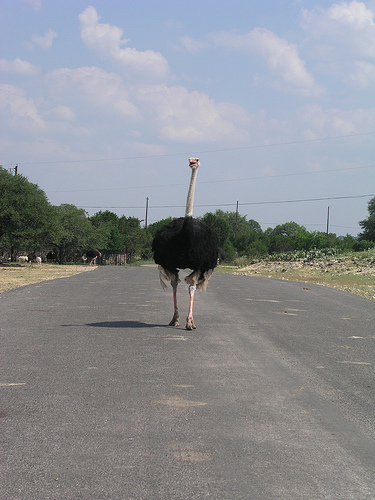

In [40]:
display(input_image)

### Pass the input through PyTorch Model

In [41]:
input = image_loader(data_transforms, input_image)
output = sample_model(input).detach().numpy()
print( np.argmax(output))

9


### Convert PyTorch model to MDF 

In [42]:
mdf_model, params_dict = pytorch_to_mdf(
        model=sample_model,
        args=input,
        trace=True,
    )

### Passing Input through MDF model

In [44]:
mdf_graph = mdf_model.graphs[0]
# mdf_graph_nodes = mdf_graph.nodes[id='Conv_499']
params_dict["input1"] = input.detach().numpy()

eg = EvaluableGraph(graph=mdf_graph, verbose=False)

eg.evaluate(initializer=params_dict)

output_mdf = eg.output_enodes[0].get_output()
np.argmax(output_mdf)


Init graph: MobileNetV3Graph
Evaluating graph: MobileNetV3Graph, root nodes: ['Conv_499'], with array format numpy


2022-08-22 19:23:53.388496924 [W:onnxruntime:, model.cc:180 Model] ONNX Runtime only *guarantees* support for models stamped with opset version 7 or above for opset domain 'ai.onnx'. Please upgrade your model to opset 7 or higher. For now, this opset 1 model may run depending upon legacy support of some older opset version operators.
2022-08-22 19:23:53.414853978 [W:onnxruntime:, ort_transpose_optimizer.cc:24 ApplyImpl] Transpose optimizer failed: Unsupported ONNX opset
2022-08-22 19:23:53.431804079 [W:onnxruntime:, model.cc:180 Model] ONNX Runtime only *guarantees* support for models stamped with opset version 7 or above for opset domain 'ai.onnx'. Please upgrade your model to opset 7 or higher. For now, this opset 6 model may run depending upon legacy support of some older opset version operators.
2022-08-22 19:23:53.431964654 [W:onnxruntime:, ort_transpose_optimizer.cc:24 ApplyImpl] Transpose optimizer failed: Unsupported ONNX opset
2022-08-22 19:23:53.469721664 [W:onnxruntime:, mod

9

In [32]:
mdf_graph

[Node(metadata=None, id='Conv_499', input_ports=[InputPort(metadata=None, id='input1', shape=(1, 3, 224, 224), type='float32'), InputPort(metadata=None, id='onnx_Conv_500', shape=(16, 3, 3, 3), type='float32'), InputPort(metadata=None, id='onnx_Conv_501', shape=(16,), type='float32')], functions=[], parameters=[Parameter(metadata=None, id='dilations', value=[1, 1], default_initial_value=None, time_derivative=None, function=None, args=None, conditions=[]), Parameter(metadata=None, id='group', value=1, default_initial_value=None, time_derivative=None, function=None, args=None, conditions=[]), Parameter(metadata=None, id='kernel_shape', value=[3, 3], default_initial_value=None, time_derivative=None, function=None, args=None, conditions=[]), Parameter(metadata=None, id='pads', value=[1, 1, 1, 1], default_initial_value=None, time_derivative=None, function=None, args=None, conditions=[]), Parameter(metadata=None, id='strides', value=[2, 2], default_initial_value=None, time_derivative=None, f

In [46]:
# mdf_graph[Node[id=='COnv']]

NameError: name 'Node' is not defined

### MDF Graph

Converting MDF graph: MobileNetV3Graph to graphviz (level: 1, format: png)
    Node: Conv_499
    Node: HardSwish_315
    Node: Conv_502
    Node: Relu_318
    Node: Conv_505
    Node: Add_321
    Node: Conv_508
    Node: Relu_324
    Node: Conv_511
    Node: Relu_327
    Node: Conv_514
    Node: Conv_517
    Node: Relu_332
    Node: Conv_520
    Node: Relu_335
    Node: Conv_523
    Node: Add_338
    Node: Conv_526
    Node: Relu_341
    Node: Conv_529
    Node: Relu_344
    Node: GlobalAveragePool_345
    Node: Conv_346
    Node: Relu_347
    Node: Conv_348
    Node: HardSigmoid_349
    Node: Mul_350
    Node: Conv_532
    Node: Conv_535
    Node: Relu_355
    Node: Conv_538
    Node: Relu_358
    Node: GlobalAveragePool_359
    Node: Conv_360
    Node: Relu_361
    Node: Conv_362
    Node: HardSigmoid_363
    Node: Mul_364
    Node: Conv_541
    Node: Add_367
    Node: Conv_544
    Node: Relu_370
    Node: Conv_547
    Node: Relu_373
    Node: GlobalAveragePool_374
    Node: Conv_37

Written graph image to: example.png


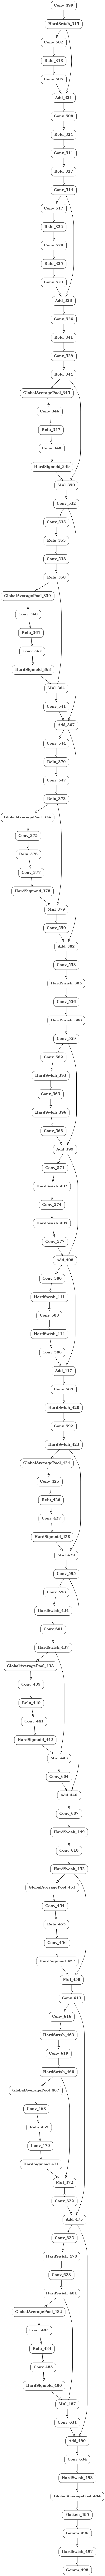

In [47]:
mdf_model.to_graph_image(
    engine="dot",
    output_format="png",
    view_on_render=False,
    level=1,
    filename_root="example",
    only_warn_on_fail=True,
)
from IPython.display import Image
Image(filename="example.png")

### ONNX Graph

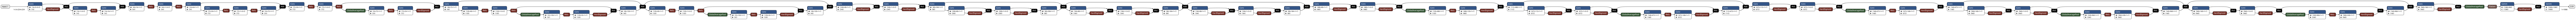

In [35]:
try:
    from IPython.display import Image
    Image(filename="example.onnx.png")
    display(onnx_graph)PyTorch
    
except:
    import netron
    torch.onnx.export(
            sample_model,
            input,
            "example.onnx",
            verbose=True,
            input_names=[],
            opset_version=9,
        )
    netron.start("example.onnx")


In [36]:
#todo
# make sure to color the MDF graph before pushing
# try to look at how to color at read the docs or src folder
# i think we have to explicitly mention like for relu this color for gemm this color!!

In [7]:
#should be removed just to check which models are being run

import inspect
models_to_test = []
model_classes = set()
for model_name, model in models.__dict__.items():
    try:
        params = inspect.signature(model).parameters

        # Get the model class that this construction function returns. To cut down on tests,
        # lets only test one version of each model.
        return_type = inspect.signature(model).return_annotation

        if (
            "weights" in params
            or "pretrained" in params
            and return_type not in model_classes
        ):
            models_to_test.append(model)
            if return_type:
                model_classes.add(return_type)

    except TypeError:
        continue

In [35]:
models_to_test

[<function torchvision.models.alexnet.alexnet(pretrained: bool = False, progress: bool = True, **kwargs: Any) -> torchvision.models.alexnet.AlexNet>,
 <function torchvision.models.convnext.convnext_tiny(*, pretrained: bool = False, progress: bool = True, **kwargs: Any) -> torchvision.models.convnext.ConvNeXt>,
 <function torchvision.models.resnet.resnet18(pretrained: bool = False, progress: bool = True, **kwargs: Any) -> torchvision.models.resnet.ResNet>,
 <function torchvision.models.vgg.vgg11(pretrained: bool = False, progress: bool = True, **kwargs: Any) -> torchvision.models.vgg.VGG>,
 <function torchvision.models.squeezenet.squeezenet1_0(pretrained: bool = False, progress: bool = True, **kwargs: Any) -> torchvision.models.squeezenet.SqueezeNet>,
 <function torchvision.models.inception.inception_v3(pretrained: bool = False, progress: bool = True, **kwargs: Any) -> torchvision.models.inception.Inception3>,
 <function torchvision.models.densenet.densenet121(pretrained: bool = False, 